Dependencies

In [8]:
import tensorflow as tf
import os

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Removing dodgy images

In [10]:
import cv2
import imghdr

C:\Users\Bruce\AppData\Local\Temp\ipykernel_19404\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [11]:
data_dir = 'data'

In [12]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Load Data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
import os

def check_file_names(directory):
    for root, dirs, files in os.walk(directory):
        for name in files + dirs:
            try:
                name.encode('utf-8')
            except UnicodeEncodeError:
                print(f"Non-UTF-8 file or directory name: {os.path.join(root, name)}")

check_file_names('data')

In [16]:
import cv2
import matplotlib.pyplot as plt

def show_image(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis("off")
        plt.title(image_path)
        plt.show()
    else:
        print(f"❌ Unable to read: {image_path}")

data_dir = "data"

for root, _, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        img = cv2.imread(file_path)
        if img is None:  # Image is unreadable
            print(f"❌ Corrupted image: {file_path}")
            show_image(file_path)  # Show the image


In [17]:
import tensorflow as tf

def safe_image_dataset_from_directory(directory):
    try:
        return tf.keras.utils.image_dataset_from_directory(directory)
    except UnicodeDecodeError as e:
        print(f"Skipping problematic file: {e}")
        return None

data = safe_image_dataset_from_directory('data')

Found 706 files belonging to 2 classes.


In [18]:
import os

data_dir = "data"  # Change this if your path is different

for root, dirs, files in os.walk(data_dir):
    for file in files:
        try:
            file.encode('utf-8')  # Try encoding to UTF-8
        except UnicodeEncodeError:
            print(f"Problematic file: {os.path.join(root, file)}")


In [19]:
import os

data_dir = "data"  # Change this if your path is different

for root, dirs, files in os.walk(data_dir):
    for file in files:
        try:
            file.encode('utf-8')  # Try encoding to UTF-8
        except UnicodeEncodeError:
            print(f"🚨 Problematic file: {os.path.join(root, file)}")


In [20]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 706 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch = data_iterator.next()

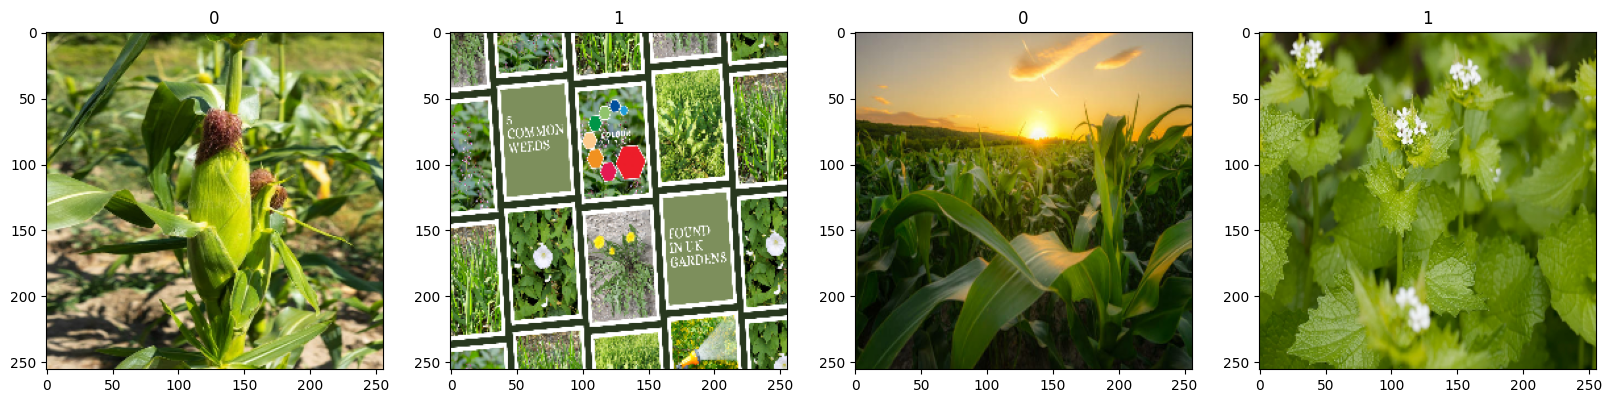

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Data Preprocessing

Scale Data

In [24]:
data = data.map(lambda x,y: (x/255, y))

In [25]:
data.as_numpy_iterator().next()

(array([[[[2.00750619e-01, 1.96829051e-01, 1.77221194e-01],
          [2.31470868e-01, 2.46069521e-01, 2.32052967e-01],
          [2.31504858e-01, 2.47191131e-01, 2.50775695e-01],
          ...,
          [5.15242040e-01, 5.50199151e-01, 5.77481627e-01],
          [5.54871321e-01, 5.72809458e-01, 5.86825967e-01],
          [5.92479408e-01, 5.90059042e-01, 6.07415080e-01]],
 
         [[1.99522614e-01, 1.88018322e-01, 1.73465624e-01],
          [2.27607816e-01, 2.32797176e-01, 2.30717495e-01],
          [2.27636173e-01, 2.42996633e-01, 2.42069080e-01],
          ...,
          [5.26820183e-01, 5.61777294e-01, 5.89059770e-01],
          [5.62312543e-01, 5.80250621e-01, 5.94267190e-01],
          [5.91673076e-01, 5.89252710e-01, 6.06608748e-01]],
 
         [[2.03170955e-01, 1.87484682e-01, 1.75719976e-01],
          [2.28615195e-01, 2.28615195e-01, 2.33118877e-01],
          [2.35352576e-01, 2.50533342e-01, 2.47117281e-01],
          ...,
          [5.25692165e-01, 5.60649276e-01, 5.8793

Split Data

In [26]:
len(data)

23

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build Deep Learning Model

In [29]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [31]:
model = Sequential()

In [32]:
import os

data_dir = "data/weeds"  # Update this if needed

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        print(f"Class '{class_name}' has {len(os.listdir(class_path))} images")


In [35]:
images, labels = next(iter(train))
print(f"Image batch shape: {images.shape}")


Image batch shape: (32, 256, 256, 3)


In [36]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Bruce\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuaracy'])

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [39]:
logdir='logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
for images, labels in train.take(1):  # Take one batch to inspect
    print(f"Batch shape: {images.shape}, Labels shape: {labels.shape}")


Batch shape: (32, 256, 256, 3), Labels shape: (32,)


In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: Could not interpret metric identifier: accuaracy

Plot Perfomance

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>